In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
%cd MyDrive/My\ Drive/

/content/MyDrive/My Drive


In [ ]:
import scipy.io
mat = scipy.io.loadmat('graph_bci/bci_competition_2020_MI_dataset/training/sample01.mat')

In [ ]:
X = mat['epo']['x'][0][0]
X.shape

(2501, 60, 150)

In [ ]:
import numpy as np
n_ch = X.shape[1]
dist_matrix = np.zeros((n_ch, n_ch))

el_pos_3d = mat['mnt']['pos_3d'][0][0].T

for i in range(n_ch):
  for j in range(n_ch):
    if i != j:
      dist_matrix[i][j] = np.exp(-np.linalg.norm(el_pos_3d[i] - el_pos_3d[j]))

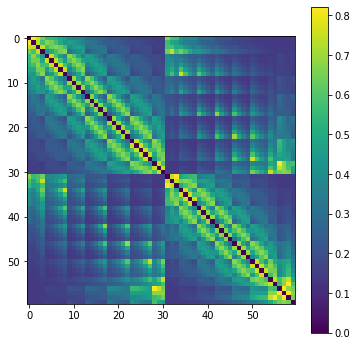

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(dist_matrix)
plt.colorbar()
plt.show();

In [ ]:
import scipy.stats as st
import numpy as np

n_ch = X.shape[1]
corr_matrix = np.zeros((n_ch, n_ch))

for i in range(n_ch):
  for j in range(n_ch):
    if i != j:
      corr_matrix[i][j] = st.pearsonr(X[:, i, 0], X[:, j, 0])[0]
corr_matrix = np.abs(corr_matrix)

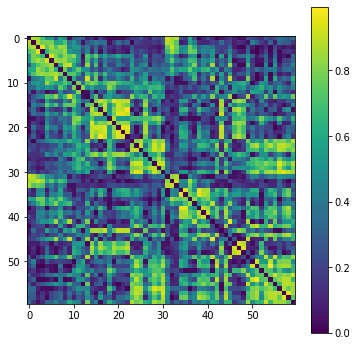

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(corr_matrix)
plt.colorbar()
plt.show();

In [ ]:
import scipy.stats as st
import numpy as np

corr_matrixs = []
n_ch = X.shape[1]

for m in range(X.shape[2]):
  corr_matrix = np.zeros((n_ch, n_ch))
  for i in range(n_ch):
    for j in range(n_ch):
      if i != j:
        corr_matrix[i][j] = st.pearsonr(X[:, i, m], X[:, j, m])[0]
  #corr_matrix = np.abs(corr_matrix)
  corr_matrixs.append(corr_matrix)

corr_matrix = np.mean(corr_matrixs, axis=0)
corr_matrix = np.abs(corr_matrix)

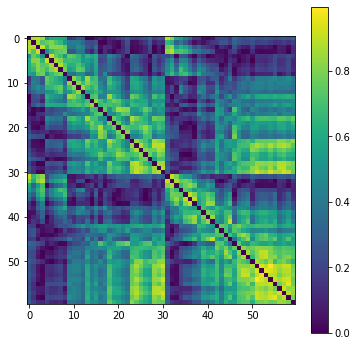

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [6.0, 6.0]
#temp_to_plot= np.zeros_like(temp)
#temp_to_plot[np.abs(temp) > 0.5] = np.abs(temp)[np.abs(temp) > 0.5]
plt.imshow(corr_matrix)
plt.colorbar()
plt.show();

In [ ]:
import scipy.signal as si
from scipy.integrate import simps

def calculate_coherence(x, y, sf, low_freq, hi_freq):
    nperseg = (2 / low_freq) * sf
    # Compute the coherence
    freqs, coh = si.coherence(x, y, fs=sf, nperseg=nperseg)
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]
    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low_freq, freqs <= hi_freq)
    # Integral approximation of the coherence using Simpson's rule.
    bp = simps(coh[idx_band], dx=freq_res)
    return bp


In [ ]:
n_ch = X.shape[1]
coherence_matrix = np.zeros((n_ch, n_ch))

sf = 250

low_freq = 12 # low beta
hi_freq = sf / 2 # hi gamma

for i in range(n_ch):
  for j in range(n_ch):
    if i != j:
      coherence_matrix[i][j] = calculate_coherence(X[:, i, 0], X[:, j, 0], sf, low_freq, hi_freq)

coherence_matrix = coherence_matrix / coherence_matrix.max()

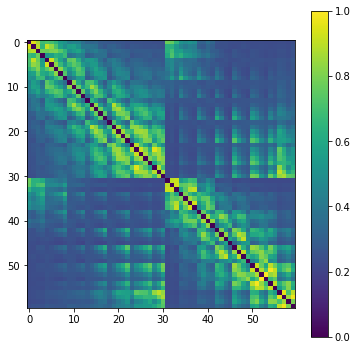

In [ ]:
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(coherence_matrix)
plt.colorbar()
plt.show();

In [ ]:
n_ch = X.shape[1]

sf = 250
coherence_matrixs = []

low_freq = 12 # low beta
hi_freq = sf / 2 # hi gamma

for m in range(X.shape[2]):
  coherence_matrix = np.zeros((n_ch, n_ch))
  for i in range(n_ch):
    for j in range(n_ch):
      if i != j:
        coherence_matrix[i][j] = calculate_coherence(X[:, i, m], X[:, j, m], sf, low_freq, hi_freq)
  coherence_matrixs.append(coherence_matrix)

coherence_matrix = np.mean(coherence_matrixs, axis=0)
coherence_matrix = coherence_matrix / coherence_matrix.max()

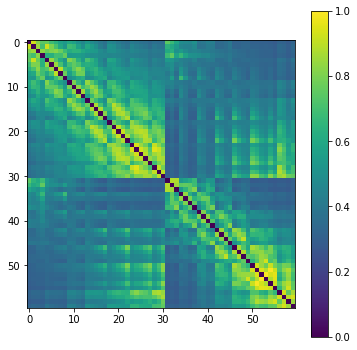

In [ ]:
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(coherence_matrix)
plt.colorbar()
plt.show();

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


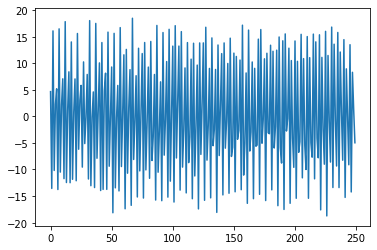

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

plt.plot(np.diff((X[:, :, 1])[:,35])[::10]);

In [ ]:
#test for stationarity
for j in range(0, X.shape[1], 10): 
  print('Channel: %d' % j)
  result = adfuller(np.diff(X[:, j, 1]))
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  print('-'*50)

Channel: 0
ADF Statistic: -9.415638
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
--------------------------------------------------
Channel: 10
ADF Statistic: -11.446122
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
--------------------------------------------------
Channel: 20
ADF Statistic: -10.106660
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
--------------------------------------------------
Channel: 30
ADF Statistic: -10.399972
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
--------------------------------------------------
Channel: 40
ADF Statistic: -10.736555
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
--------------------------------------------------
Channel: 50
ADF Statistic: -9.627611
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
--------------------------------------------------


In [ ]:
import numpy as np

model = VAR(np.diff(X[:, :, 0]))
results = model.fit(maxlags=15, ic='aic') #aic - информационный критерий акаике

#results.summary()
results.k_ar

9

In [ ]:
A, b = results.params[1:, :].reshape(results.k_ar, -1, 59), results.sigma_u
A.shape, b.shape

((9, 59, 59), (59, 59))

In [ ]:
from scot.connectivity import Connectivity

In [ ]:
connectivity = Connectivity(b=A.T, c=b, nfft=20) #for frequency resolution = 6.25 per bin

res = connectivity.PDC()
res.shape

(59, 59, 20)

In [ ]:
from scipy.integrate import simps

low_f = 12
# Frequency resolution
freq_res = 6.25
ind_mask = np.array([6.25*i for i in range(1, 21)]) >= low_f + 1

# Compute the absolute pdc by approximating the area under the curve
pdcoh = simps(res[:, :, ind_mask], dx=freq_res)
#зануляем диагональные и нормируем
np.fill_diagonal(pdcoh, 0)

pdcoh_sym = np.zeros_like(pdcoh) 

for i in range(len(pdcoh)):
  for j in range(len(pdcoh)):
    pdcoh_sym[i][j] = pdcoh[i][j] + pdcoh[j][i]

pdcoh_sym = pdcoh_sym / pdcoh_sym.max()

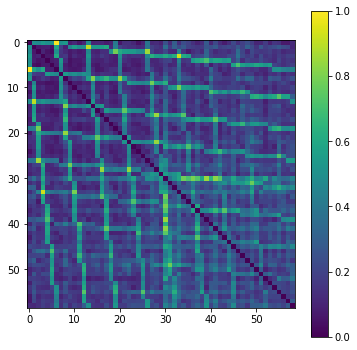

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(pdcoh_sym)
plt.colorbar()
plt.show();

In [ ]:
import math
import numpy as np
from scipy import linalg, fftpack
import matplotlib.pyplot as plt
def spectral_density(A, n_fft=None):
    """Estimate PSD from AR coefficients
    Parameters
    ----------
    A : ndarray, shape (p, N, N)
        The AR coefficients where N is the number of signals
        and p the order of the model.
    n_fft : int
        The length of the FFT
    Returns
    -------
    fA : ndarray, shape (n_fft, N, N)
        The estimated spectral density.
    """
    p, N, N = A.shape
    if n_fft is None:
        n_fft = max(int(2 ** math.ceil(np.log2(p))), 512)
    A2 = np.zeros((n_fft, N, N))
    A2[1:p + 1, :, :] = A  # start at 1 !
    fA = fftpack.fft(A2, axis=0)
    freqs = fftpack.fftfreq(n_fft)
    I = np.eye(N)

    for i in range(n_fft):
        fA[i] = linalg.inv(I - fA[i])

    return fA, freqs


def DTF(A, sigma=None, n_fft=None):
    """Direct Transfer Function (DTF)
    Parameters
    ----------
    A : ndarray, shape (p, N, N)
        The AR coefficients where N is the number of signals
        and p the order of the model.
    sigma : array, shape (N, )
        The noise for each time series
    n_fft : int
        The length of the FFT
    Returns
    -------
    D : ndarray, shape (n_fft, N, N)
        The estimated DTF
    """
    p, N, N = A.shape

    if n_fft is None:
        n_fft = max(int(2 ** math.ceil(np.log2(p))), 512)

    H, freqs = spectral_density(A, n_fft)
    D = np.zeros((n_fft, N, N))

    if sigma is None:
        sigma = np.ones(N)

    for i in range(n_fft):
        S = H[i]
        V = (S * sigma[None, :]).dot(S.T.conj())
        V = np.abs(np.diag(V))
        D[i] = np.abs(S * np.sqrt(sigma[None, :])) / np.sqrt(V)[:, None]

    return D, freqs


def PDC(A, sigma=None, n_fft=None):
    """Partial directed coherence (PDC)
    Parameters
    ----------
    A : ndarray, shape (p, N, N)
        The AR coefficients where N is the number of signals
        and p the order of the model.
    sigma : array, shape (N,)
        The noise for each time series.
    n_fft : int
        The length of the FFT.
    Returns
    -------
    P : ndarray, shape (n_fft, N, N)
        The estimated PDC.
    """
    p, N, N = A.shape

    if n_fft is None:
        n_fft = max(int(2 ** math.ceil(np.log2(p))), 512)

    H, freqs = spectral_density(A, n_fft)
    P = np.zeros((n_fft, N, N))

    if sigma is None:
        sigma = np.ones(N)

    for i in range(n_fft):
        B = H[i]
        B = linalg.inv(B)
        V = np.abs(np.dot(B.T.conj(), B * (1. / sigma[:, None])))
        V = np.diag(V)  # denominator squared
        P[i] = np.abs(B * (1. / np.sqrt(sigma))[None, :]) / np.sqrt(V)[None, :]

    return P, freqs

In [ ]:
b

array([[ 0.42797333, -0.18870786, -0.06324349, ..., -0.00499627,
        -0.00674872,  0.00637119],
       [-0.18870786,  0.6843546 ,  0.05476171, ...,  0.00069412,
         0.0181786 , -0.05616859],
       [-0.06324349,  0.05476171,  0.37903292, ...,  0.00199998,
         0.01188038, -0.00428785],
       ...,
       [-0.00499627,  0.00069412,  0.00199998, ...,  0.25350258,
         0.04243615, -0.09077851],
       [-0.00674872,  0.0181786 ,  0.01188038, ...,  0.04243615,
         0.39248749, -0.36006134],
       [ 0.00637119, -0.05616859, -0.00428785, ..., -0.09077851,
        -0.36006134,  0.64807321]])

In [ ]:
pdc, freqs = PDC(A, np.diagonal(b), n_fft=20)

In [ ]:
pdc.T.shape

(59, 59, 20)

In [ ]:
freqs[1] - freqs[0]

0.05

In [ ]:
freqs.min(), freqs.max(), pdc.max()

(-0.5, 0.45, 0.9512768465596289)

In [ ]:
from scipy.integrate import simps

low_f = 12
# Frequency resolution
freq_res = 6.25
ind_mask = np.array([6.25*i for i in range(1, 21)]) >= low_f + 1

# Compute the absolute pdc by approximating the area under the curve
pdcoh = simps(pdc.T[:, :, ind_mask], dx=freq_res)
#зануляем диагональные и нормируем
np.fill_diagonal(pdcoh, 0)

pdcoh_sym = np.zeros_like(pdcoh) 

for i in range(len(pdcoh)):
  for j in range(len(pdcoh)):
    pdcoh_sym[i][j] = 0.5* (pdcoh[i][j] + pdcoh[j][i])

pdcoh_sym = pdcoh_sym / pdcoh_sym.max()

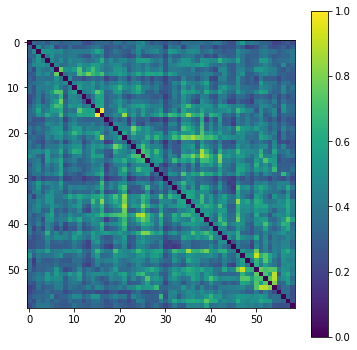

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(pdcoh_sym)
plt.colorbar()
plt.show();

Phase locking value

In [ ]:
import scipy.signal as si
import numpy as np

def calculate_plv(x, y):
  analytic_x = si.hilbert(x)
  analytic_y = si.hilbert(y)

  phase_x = np.unwrap(np.angle(analytic_x))
  phase_y = np.unwrap(np.angle(analytic_y))

  plv = np.mean([np.exp(1j*(phase_x - phase_y))])
  plv = np.sqrt(np.real(plv)**2 + np.imag(plv)**2)
  return plv

n_ch = X.shape[1]
plv_matrix = np.zeros((n_ch, n_ch))

for i in range(n_ch):
  for j in range(n_ch):
    if i != j:
      plv_matrix[i][j] = calculate_plv(X[:, i, 0], X[:, j, 0])

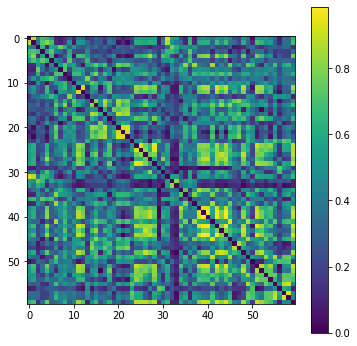

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(plv_matrix)
plt.colorbar()
plt.show();

In [ ]:
n_ch = X.shape[1]
plv_matrixs = []

for m in range(X.shape[2]):
  plv_matrix = np.zeros((n_ch, n_ch))
  for i in range(n_ch):
    for j in range(n_ch):
      if i != j:
        plv_matrix[i][j] = calculate_plv(X[:, i, m], X[:, j, m])
  plv_matrixs.append(plv_matrix)

plv_matrix = np.mean(plv_matrixs, axis=0)

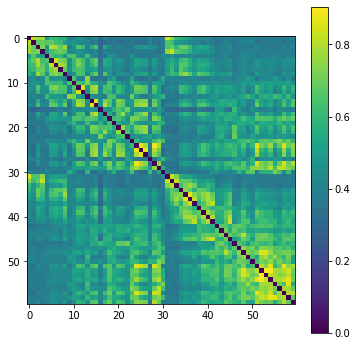

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6.0, 6.0]
plt.imshow(plv_matrix)
plt.colorbar()
plt.show();